In [1]:
!pip install rasterio
!pip install fiona

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive

drive.mount("/content/drive")
import os

os.chdir("/content/drive/My Drive/DSSG (STC   UNICEF)/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
import numpy as np

# load country geotiff
img = rasterio.open("Data/cpiNDVIData.tif")

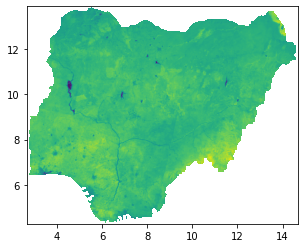

In [76]:
# plot
show(img)

In [77]:
# get geometry for training data
# file in shared drive -> NGA Hex folder

import fiona

with fiona.open("NGA Hex/nga_hex_training.shp", "r") as shapefile:
    shapes = [feature["geometry"] for feature in shapefile]

In [78]:
len(shapes)

1357

In [79]:
import rasterio.mask
import skimage.transform as st

# saving hexagons into list for now
images = []

In [80]:
%%time

for shape in shapes:
    with rasterio.open("Data/cpiNDVIData.tif") as src:
        out_image, out_transform = rasterio.mask.mask(src, [shape], crop=True)
        # resizing will be needed for conversion to array later
        # out_image = st.resize(out_image, (1, dim1, dim2))
        images.append(out_image)

CPU times: user 7.33 s, sys: 889 ms, total: 8.22 s
Wall time: 10.4 s


In [93]:
# will need to be resized into same dimensions

images[0].shape, images[1].shape, images[4].shape

((1, 3, 3), (1, 4, 4), (1, 4, 3))

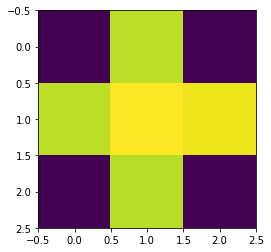

In [90]:
show(images[0])